In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
class ELM():
    
    def __init__(self,nodes):
        self.neurons = nodes
    
    def sigmoid(self,z):
        
        s = 1/(1+np.exp(-z))
        return s
    
    def tanh(self,z):
        s = np.tanh(z)
        return s
    
    def initlialization(self,X):
        
        self.W = np.random.randn(self.neurons,X.shape[0])
        self.b = np.ones(shape=(self.neurons,1))
        
    def fit(self,X,Y):
        
        self.initlialization(X)
        z = np.dot(self.W,X)+self.b
        H = self.tanh(z)
        self.B = np.dot(Y,np.linalg.pinv(H))
    
    def predict(self,X):
        z = np.dot(self.W,X)+self.b
        H = self.tanh(z)
        y_pred = np.dot(self.B,H)
        
        return y_pred

In [7]:
def import_dataset(normalised=True,scaleMethod='Standard'):
    '''
    Imports Dataset and returns either scaled values depending upon user inputs
    
    Input:
        normalised -- boolean depending upon whether the user wants to scale the values
        scaleMethod -- Type of scaler to be used if normalised is True
    
    Output:
        (X_train,X_test,Y_train,Y_test) -- the training and testing dataset
        scaler -- used to perform inverse transform if dataset is scaled
    '''
    data = pd.read_csv('MLDataset.csv')
    dataS = data.drop('Unnamed: 0',axis=1)
    
    if normalised == False:
        scaler = 'None'
        X = dataS.iloc[:,0:3].values
        Y = dataS.iloc[:,3:].values
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
        
    elif scaleMethod == 'Standard':
        scaler = StandardScaler()
        scaler.fit(dataS)
        dataS = scaler.transform(dataS)
        X = dataS[:,0:3]
        Y = dataS[:,3:]
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=0)
    
    elif scaleMethod == 'MinMax':
        scaler = MinMaxScaler(feature_range=(-1,1))
        scaler.fit(dataS)
        dataS = scaler.transform(dataS)
        X = dataS[:,0:3]
        Y = dataS[:,3:]
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=0)
    
    return X_train,X_test,Y_train,Y_test,scaler

In [8]:
def inverseTransform(scaler,*arr):
    '''
    Used to perform Inverse Transformation on normalised dataset
    
    Input:
        scaler -- Instance of Normaliser used
        *arr -- list of arrays to be concatenated
    '''
    data = np.concatenate(arr,axis=1)
    data = pd.DataFrame(data)
    arrInverse = scaler.inverse_transform(data)
    
    return arrInverse

In [9]:
def cost(y_test,y_pred):
    '''
    Calculates error of the model
    '''
    error = (y_test-y_pred)/y_test
    error = np.sum(abs(error))/(y_test.shape[0]*y_test.shape[1])*100
    
    return error

In [10]:
def errorMagnitude(y_true,y_pred):
    
    minMag = min([min(abs(i)) for i in y_true-y_pred])
    maxMag = max([max(abs(i)) for i in y_true-y_pred])
    
    return (minMag,maxMag)

In [11]:
def train(X_train,Y_train,X_test,Y_test,Model,normalise,scaler,giveMagnitude=False):

    Ytr_pred = Model.predict(X_train.T)
    Ytr_pred = Ytr_pred.T
    Yts_pred = Model.predict(X_test.T)
    Yts_pred = Yts_pred.T
    if not normalise:
        error = cost(Y_test,Yts_pred)
        error_tr = cost(Y_train,Ytr_pred)
        
        if giveMagnitude:
            magnitude = errorMagnitude(Y_test,Yts_pred)
            return (error_tr,error,magnitude)
    else:
        true = inverseTransform(scaler,X_train,Y_train)
        pred = inverseTransform(scaler,X_train,Ytr_pred)

        error_tr = cost(true[:,3:],pred[:,3:])

        true = inverseTransform(scaler,X_test,Y_test)
        pred = inverseTransform(scaler,X_test,Yts_pred)

        error = cost(true[:,3:],pred[:,3:])
        
        if giveMagnitude:
            magnitude = errorMagnitude(true[:,3:],pred[:,3:])
            return (error_tr,error,magnitude)
        
    return (error_tr,error)

In [12]:
X_train,X_test,Y_train,Y_test,scaler = import_dataset(scaleMethod='MinMax')

In [13]:
values = []
for i in range(10,200):
    elm = ELM(nodes=i)
    elm.fit(X_train.T,Y_train.T)
    val = train(X_train,Y_train,X_test,Y_test,elm,normalise=True,scaler=scaler,giveMagnitude=True)
    values.append(val)

In [14]:
import matplotlib.pyplot as plt

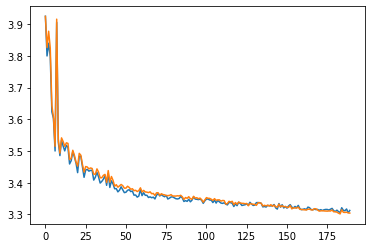

In [15]:
plt.plot([i[1] for i in values])
plt.plot([i[0] for i in values])

In [16]:
values

[(3.924193419655584,
  3.92480094722537,
  (0.0012003334502423968, 47.54128962514528)),
 (3.8260580721543618,
  3.799558304699296,
  (0.006247000394353108, 48.28013552390206)),
 (3.87754247971223,
  3.8398004934100527,
  (0.0007492355150588992, 49.131034859802526)),
 (3.824707904550062,
  3.7982835030274513,
  (8.214916476845247e-06, 44.29967631072077)),
 (3.6436922304752795,
  3.6234837756631513,
  (0.00028482778213856363, 51.925757413979056)),
 (3.606434370993487,
  3.6022309305958755,
  (0.00034424903606122825, 46.7964006797078)),
 (3.5146341861131387,
  3.499944025438887,
  (0.005225198326229474, 43.11487778819401)),
 (3.9156372149518464,
  3.905730563716069,
  (0.00037163877573220816, 42.67138448904166)),
 (3.5377009301939393,
  3.5281727155001725,
  (7.6283811267785495e-06, 41.08892373114054)),
 (3.493024459032537,
  3.485413313341356,
  (0.00023725722218159717, 39.746302034932114)),
 (3.541247349891783,
  3.5339069789692514,
  (0.0037876031706218782, 40.3958473015839)),
 (3.5298